In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Masking, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
import matplotlib.pyplot as plt
import tensorflow as tf

## Target Growth 1

In [50]:
df = pd.read_csv('FidelFolio_df1.csv')

for col in df.columns:
    if col not in ['Company', 'Year']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        
df1 = df

target_col = 'Target 1'
# Assuming 'Year' column exists and is of numeric type.  If not, convert it first.
df1_insample = df1[df1['Year'] < 2024]
df1_outsample = df1[df1['Year'] == 2024]

df1_insample_with_meta = df1_insample[['Company', 'Year']].copy()  # ✅ Save meta info
df1_insample = df1_insample.dropna()  # Keep this after separating

features = df.drop(columns=[target_col])
feature_cols = features.columns 

df_out = df1_outsample.copy()
df_out_meta = df_out[['Company', 'Year']].copy()  # ✅ Save meta info

c:\Users\Tanishq op\anaconda3\Lib\site-packages\keras\src\layers\core\masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\Tanishq op\anaconda3\Lib\site-packages\keras\src\layers\layer.py:938: UserWarning: Layer 'conv1d_8' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Epoch 1/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1882 - mae: 0.3149

251/251 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - loss: 0.1878 - mae: 0.3145 - val_loss: 0.0024 - val_mae: 0.0396 - learning_rate: 5.0000e-04
Epoch 2/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0223 - mae: 0.1154 - val_loss: 0.0025 - val_mae: 0.0369 - learning_rate: 5.0000e-04
Epoch 3/50
249/251 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0082 - mae: 0.0697

251/251 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0082 - mae: 0.0697 - val_loss: 0.0013 - val_mae: 0.0288 - learning_rate: 5.0000e-04
Epoch 4/50
250/251 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0042 - mae: 0.0501

251/251 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0042 - mae: 0.0501 - val_loss: 6.9319e-04 - val_mae: 0.0192 - learning_rate: 5.0000e-04
Epoch 5/50
249/251 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026 - mae: 0.0386

251/251 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 0.0026 - mae: 0.0386 - val_loss: 5.1188e-04 - val_mae: 0.0162 - learning_rate: 5.0000e-04
Epoch 6/50
249/251 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0020 - mae: 0.0319

251/251 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0020 - mae: 0.0319 - val_loss: 4.7082e-04 - val_mae: 0.0163 - learning_rate: 5.0000e-04
Epoch 7/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0014 - mae: 0.0273 - val_loss: 4.8606e-04 - val_mae: 0.0175 - learning_rate: 5.0000e-04
Epoch 8/50
250/251 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0011 - mae: 0.0228

251/251 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0011 - mae: 0.0228 - val_loss: 2.9108e-04 - val_mae: 0.0119 - learning_rate: 5.0000e-04
Epoch 9/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 8.2565e-04 - mae: 0.0208 - val_loss: 3.6062e-04 - val_mae: 0.0160 - learning_rate: 5.0000e-04
Epoch 10/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.5883e-04 - mae: 0.0193

251/251 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 7.5872e-04 - mae: 0.0193 - val_loss: 2.2010e-04 - val_mae: 0.0108 - learning_rate: 5.0000e-04
Epoch 11/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 6.1151e-04 - mae: 0.0175 - val_loss: 2.3700e-04 - val_mae: 0.0121 - learning_rate: 4.5242e-04
Epoch 12/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 6.6778e-04 - mae: 0.0157 - val_loss: 2.9385e-04 - val_mae: 0.0131 - learning_rate: 4.0937e-04
Epoch 13/50
250/251 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.4405e-04 - mae: 0.0164

251/251 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 5.4425e-04 - mae: 0.0164 - val_loss: 1.4559e-04 - val_mae: 0.0077 - learning_rate: 3.7041e-04
Epoch 14/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 5.9228e-04 - mae: 0.0146 - val_loss: 1.5722e-04 - val_mae: 0.0079 - learning_rate: 3.3516e-04
Epoch 15/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 4.0226e-04 - mae: 0.0136 - val_loss: 2.6857e-04 - val_mae: 0.0123 - learning_rate: 3.0327e-04
Epoch 16/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 3.8205e-04 - mae: 0.0133 - val_loss: 1.8813e-04 - val_mae: 0.0094 - learning_rate: 2.7441e-04
Epoch 17/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.1671e-04 - mae: 0.0119

251/251 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 3.1691e-04 - mae: 0.0119 - val_loss: 1.3568e-04 - val_mae: 0.0075 - learning_rate: 2.4829e-04
Epoch 18/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 3.0785e-04 - mae: 0.0118 - val_loss: 1.5742e-04 - val_mae: 0.0083 - learning_rate: 2.2466e-04
Epoch 19/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 4.9504e-04 - mae: 0.0126 - val_loss: 1.5693e-04 - val_mae: 0.0080 - learning_rate: 2.0328e-04
Epoch 20/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.4122e-04 - mae: 0.0121

251/251 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 3.4123e-04 - mae: 0.0121 - val_loss: 1.2331e-04 - val_mae: 0.0075 - learning_rate: 1.8394e-04
Epoch 21/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 3.3669e-04 - mae: 0.0112 - val_loss: 1.6897e-04 - val_mae: 0.0097 - learning_rate: 1.6644e-04
Epoch 22/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 2.6433e-04 - mae: 0.0113 - val_loss: 1.4521e-04 - val_mae: 0.0073 - learning_rate: 1.5060e-04
Epoch 23/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 2.3898e-04 - mae: 0.0106 - val_loss: 1.5964e-04 - val_mae: 0.0088 - learning_rate: 1.3627e-04
Epoch 24/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 2.5515e-04 - mae: 0.0108 - val_loss: 1.6847e-04 - val_mae: 0.0088 - learning_rate: 1.2330e-04
Epoch 25/50
249/251 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.7006e-04 - mae: 0.0106

251/251 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 2.7047e-04 - mae: 0.0106 - val_loss: 1.1411e-04 - val_mae: 0.0064 - learning_rate: 1.1157e-04
Epoch 26/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 3.3901e-04 - mae: 0.0101 - val_loss: 1.5641e-04 - val_mae: 0.0082 - learning_rate: 1.0095e-04
Epoch 27/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 2.2907e-04 - mae: 0.0099 - val_loss: 1.4323e-04 - val_mae: 0.0085 - learning_rate: 9.1342e-05
Epoch 28/50
248/251 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.3138e-04 - mae: 0.0099

251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 2.3215e-04 - mae: 0.0099 - val_loss: 1.1237e-04 - val_mae: 0.0064 - learning_rate: 8.2649e-05
Epoch 29/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.5487e-04 - mae: 0.0096

251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 2.5491e-04 - mae: 0.0096 - val_loss: 1.0985e-04 - val_mae: 0.0063 - learning_rate: 7.4784e-05
Epoch 30/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 2.4673e-04 - mae: 0.0092 - val_loss: 1.1603e-04 - val_mae: 0.0064 - learning_rate: 6.7668e-05
Epoch 31/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 2.1358e-04 - mae: 0.0090 - val_loss: 1.1107e-04 - val_mae: 0.0062 - learning_rate: 6.1228e-05
Epoch 32/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 2.7210e-04 - mae: 0.0089 - val_loss: 1.2053e-04 - val_mae: 0.0068 - learning_rate: 5.5402e-05
Epoch 33/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 1.8606e-04 - mae: 0.0085 - val_loss: 1.3863e-04 - val_mae: 0.0080 - learning_rate: 5.0129e-05
Epoch 34/50
250/251 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.0642e-04 - mae: 0.0088

251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 2.0671e-04 - mae: 0.0088 - val_loss: 1.0783e-04 - val_mae: 0.0059 - learning_rate: 4.5359e-05
Epoch 35/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 2.3156e-04 - mae: 0.0089 - val_loss: 1.1105e-04 - val_mae: 0.0064 - learning_rate: 4.1043e-05
Epoch 36/50
250/251 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.0475e-04 - mae: 0.0084

251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 2.0498e-04 - mae: 0.0084 - val_loss: 1.0709e-04 - val_mae: 0.0059 - learning_rate: 3.7137e-05
Epoch 37/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 1.7457e-04 - mae: 0.0083 - val_loss: 1.0955e-04 - val_mae: 0.0063 - learning_rate: 3.3603e-05
Epoch 38/50
249/251 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3.3889e-04 - mae: 0.0086

251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 3.3758e-04 - mae: 0.0086 - val_loss: 1.0461e-04 - val_mae: 0.0056 - learning_rate: 3.0405e-05
Epoch 39/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 2.5907e-04 - mae: 0.0083 - val_loss: 1.0682e-04 - val_mae: 0.0062 - learning_rate: 2.7512e-05
Epoch 40/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 3.3478e-04 - mae: 0.0086 - val_loss: 1.0855e-04 - val_mae: 0.0060 - learning_rate: 2.4894e-05
Epoch 41/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 2.1079e-04 - mae: 0.0082 - val_loss: 1.0770e-04 - val_mae: 0.0064 - learning_rate: 2.2525e-05
Epoch 42/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 2.0822e-04 - mae: 0.0081 - val_loss: 1.0953e-04 - val_mae: 0.0067 - learning_rate: 2.0381e-05
Epoch 43/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 1.7508e-04 - mae: 0.0080 - val_loss: 1.0679e-04 - val_mae: 0.0063 - learning_rate: 1.8442e-05
Epoch 44/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 2.2452e-04 - m

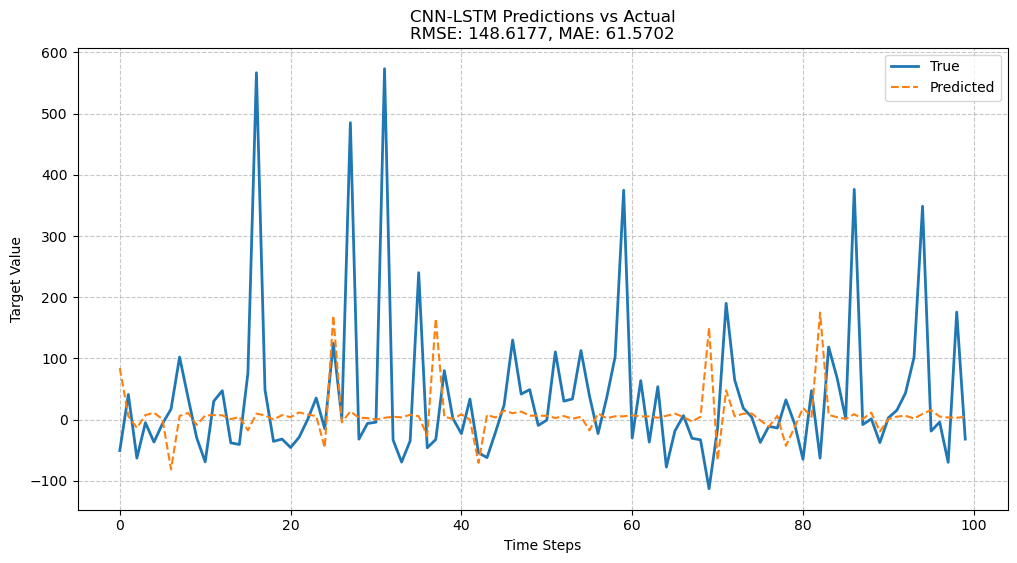

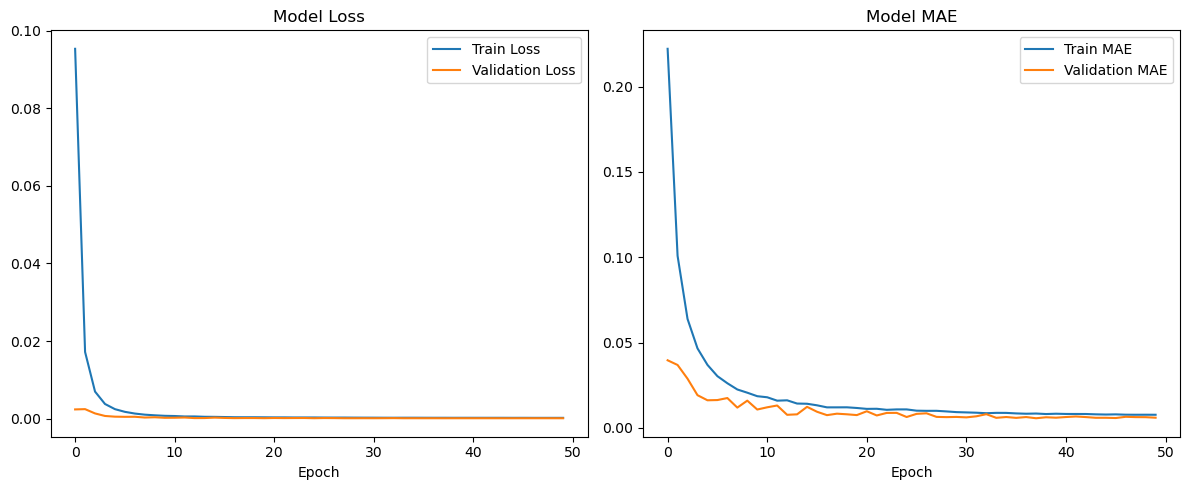

In [51]:
# ---------- SETTINGS ----------
SEQ_LEN = 30
MASK_VALUE = -999.
BATCH_SIZE = 64
EPOCHS = 50
INIT_LR = 0.0005

# ---------- IN-SAMPLE ----------
df = df1_insample.copy()

# Save original for future merging
df_original = df.copy()

# Drop categorical columns and target for features
features = df.drop(columns=[target_col, 'Company', 'Year'])  # 👈 Drop non-numeric
feature_cols = features.columns  # ✅ Save for outsample use
target = df[target_col].values

# Scale features
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(features)
X_scaled = pd.DataFrame(X_scaled, columns=features.columns)
X_scaled = X_scaled.fillna(X_scaled.mean())

# Scale target
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(target.reshape(-1, 1)).flatten()

# Create sequences
def create_sequences(data, targets, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = targets[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

X_seq, y_seq = create_sequences(X_scaled.to_numpy(), y_scaled, SEQ_LEN)

# Train/Val/Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X_seq, y_seq, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ---------- MODEL ----------
def lr_scheduler(epoch, lr):
    return float(lr) if epoch < 10 else float(lr * np.exp(-0.1))

def build_model(input_shape):
    model = Sequential()
    model.add(Masking(mask_value=MASK_VALUE, input_shape=input_shape))
    model.add(Conv1D(128, 3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(2))
    model.add(Dropout(0.2))
    model.add(Conv1D(64, 3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(2))
    model.add(Dropout(0.2))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(64))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    return model

model = build_model((SEQ_LEN, X_train.shape[2]))
optimizer = Adam(learning_rate=INIT_LR, clipvalue=1.0)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# ---------- TRAIN ----------
callbacks = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True),
    LearningRateScheduler(lr_scheduler)
]

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    verbose=1
)

# ---------- EVALUATE ----------
y_pred_scaled = model.predict(X_test).flatten()
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_true = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = np.mean(np.abs(y_true - y_pred))
print(f"\n🎯 CNN-LSTM RMSE: {rmse:.4f}")
print(f"🎯 CNN-LSTM MAE: {mae:.4f}")

# ---------- PLOTS ----------
plt.figure(figsize=(12, 6))
plt.plot(y_true[:100], label='True', linewidth=2)
plt.plot(y_pred[:100], label='Predicted', linestyle='--', linewidth=1.5)
plt.legend()
plt.title(f"CNN-LSTM Predictions vs Actual\nRMSE: {rmse:.4f}, MAE: {mae:.4f}")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel("Time Steps")
plt.ylabel("Target Value")
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()


In [54]:
# ---------- OUTSAMPLE PREDICTION ----------
df_out = df1_outsample.copy()

# Backup meta info
df_out_meta = df_out[['Company', 'Year']].reset_index(drop=True)

# Drop meta columns for processing
df_out = df_out.drop(columns=['Company', 'Year'], errors='ignore')


# Ensure all feature columns are present
for col in feature_cols:
    if col not in df_out.columns:
        df_out[col] = 0  # Fill missing columns

# Align feature columns
df_out = df_out[feature_cols]

# Fill NaNs and scale
X_out_scaled = scaler_X.transform(df_out.fillna(0))

# Create sequences and track their corresponding metadata index
X_out_seq = []
meta_indices = []

for i in range(len(X_out_scaled) - SEQ_LEN):
    seq = X_out_scaled[i:i+SEQ_LEN]
    X_out_seq.append(seq)
    meta_indices.append(i + SEQ_LEN)  # We predict for this future point

X_out_seq = np.array(X_out_seq)

# Predict
y_out_scaled_pred = model.predict(X_out_seq).flatten()
y_out_pred = scaler_y.inverse_transform(y_out_scaled_pred.reshape(-1, 1)).flatten()

# Prepare final prediction DataFrame
df_pred = df_out.iloc[meta_indices].reset_index(drop=True)
df_pred_meta = df_out_meta.iloc[meta_indices].reset_index(drop=True)

df_pred['Predicted Target 1'] = y_out_pred

# Combine meta + prediction
df_pred_final = pd.concat([df_pred_meta, df_pred], axis=1)

# View results
print("\n📈 Sample Out-of-Sample Predictions:")
print(df_pred_final[['Company', 'Year', 'Predicted Target 1']].head())

df_pred_final.to_csv('LSTM-Target1.csv')

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

📈 Sample Out-of-Sample Predictions:
            Company  Year  Predicted Target 1
0      Adani Wilmar  2024           -3.400702
1        Aditya AMC  2024            3.876047
2  Aditya Bir. Fas.  2024           15.960371
3  Aditya Birla Cap  2024            1.433347
4     Aditya Vision  2024            6.240922


## Target Growth 2

In [55]:
df = pd.read_csv('FidelFolio_df2.csv')

for col in df.columns:
    if col not in ['Company', 'Year']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        
df2 = df
target_col = 'Target 2'

# Assuming 'Year' column exists and is of numeric type.  If not, convert it first.
df2_insample = df2[df2['Year'] < 2023]
df2_outsample = df2[df2['Year'] >= 2023]

df2_insample_with_meta = df2_insample[['Company', 'Year']].copy()  # ✅ Save meta info
df2_insample = df2_insample.dropna()  # Keep this after separating

features = df.drop(columns=[target_col])
feature_cols = features.columns 

df_out = df2_outsample.copy()
df_out_meta = df_out[['Company', 'Year']].copy()  # ✅ Save meta info

Epoch 1/50


c:\Users\Tanishq op\anaconda3\Lib\site-packages\keras\src\layers\core\masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\Tanishq op\anaconda3\Lib\site-packages\keras\src\layers\layer.py:938: UserWarning: Layer 'conv1d_10' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3118 - mae: 0.3877

234/234 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.3111 - mae: 0.3871 - val_loss: 0.0017 - val_mae: 0.0314 - learning_rate: 5.0000e-04
Epoch 2/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0298 - mae: 0.1345 - val_loss: 0.0061 - val_mae: 0.0656 - learning_rate: 5.0000e-04
Epoch 3/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0135 - mae: 0.0902 - val_loss: 0.0038 - val_mae: 0.0438 - learning_rate: 5.0000e-04
Epoch 4/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0078 - mae: 0.0686 - val_loss: 0.0032 - val_mae: 0.0472 - learning_rate: 5.0000e-04
Epoch 5/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0050 - mae: 0.0539

234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0050 - mae: 0.0539 - val_loss: 0.0012 - val_mae: 0.0292 - learning_rate: 5.0000e-04
Epoch 6/50
232/234 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0033 - mae: 0.0447

234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0033 - mae: 0.0447 - val_loss: 8.7124e-04 - val_mae: 0.0222 - learning_rate: 5.0000e-04
Epoch 7/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0025 - mae: 0.0382

234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0025 - mae: 0.0381 - val_loss: 5.2953e-04 - val_mae: 0.0165 - learning_rate: 5.0000e-04
Epoch 8/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0019 - mae: 0.0334

234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0019 - mae: 0.0334 - val_loss: 4.5302e-04 - val_mae: 0.0158 - learning_rate: 5.0000e-04
Epoch 9/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0015 - mae: 0.0287 - val_loss: 6.7907e-04 - val_mae: 0.0202 - learning_rate: 5.0000e-04
Epoch 10/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0014 - mae: 0.0277

234/234 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0014 - mae: 0.0277 - val_loss: 2.7177e-04 - val_mae: 0.0104 - learning_rate: 5.0000e-04
Epoch 11/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0012 - mae: 0.0245 - val_loss: 4.2923e-04 - val_mae: 0.0157 - learning_rate: 4.5242e-04
Epoch 12/50
233/234 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 9.3250e-04 - mae: 0.0223

234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 9.3293e-04 - mae: 0.0223 - val_loss: 2.2956e-04 - val_mae: 0.0096 - learning_rate: 4.0937e-04
Epoch 13/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 8.7270e-04 - mae: 0.0215 - val_loss: 6.1309e-04 - val_mae: 0.0204 - learning_rate: 3.7041e-04
Epoch 14/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 8.1047e-04 - mae: 0.0199 - val_loss: 2.8282e-04 - val_mae: 0.0116 - learning_rate: 3.3516e-04
Epoch 15/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 8.0116e-04 - mae: 0.0189 - val_loss: 2.6052e-04 - val_mae: 0.0114 - learning_rate: 3.0327e-04
Epoch 16/50
233/234 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 7.7574e-04 - mae: 0.0179

234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 7.7501e-04 - mae: 0.0179 - val_loss: 2.0979e-04 - val_mae: 0.0102 - learning_rate: 2.7441e-04
Epoch 17/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 7.9707e-04 - mae: 0.0172 - val_loss: 2.5494e-04 - val_mae: 0.0116 - learning_rate: 2.4829e-04
Epoch 18/50
233/234 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 6.5224e-04 - mae: 0.0163

234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 6.5189e-04 - mae: 0.0163 - val_loss: 1.9152e-04 - val_mae: 0.0091 - learning_rate: 2.2466e-04
Epoch 19/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 5.7912e-04 - mae: 0.0163 - val_loss: 2.1361e-04 - val_mae: 0.0104 - learning_rate: 2.0328e-04
Epoch 20/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 4.7908e-04 - mae: 0.0149 - val_loss: 2.1448e-04 - val_mae: 0.0102 - learning_rate: 1.8394e-04
Epoch 21/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.7976e-04 - mae: 0.0151

234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 5.7961e-04 - mae: 0.0151 - val_loss: 1.7910e-04 - val_mae: 0.0078 - learning_rate: 1.6644e-04
Epoch 22/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 5.2112e-04 - mae: 0.0147 - val_loss: 2.0756e-04 - val_mae: 0.0090 - learning_rate: 1.5060e-04
Epoch 23/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 4.6926e-04 - mae: 0.0141 - val_loss: 2.1343e-04 - val_mae: 0.0093 - learning_rate: 1.3627e-04
Epoch 24/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.1900e-04 - mae: 0.0135

234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 4.1931e-04 - mae: 0.0135 - val_loss: 1.7813e-04 - val_mae: 0.0077 - learning_rate: 1.2330e-04
Epoch 25/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 4.8163e-04 - mae: 0.0133 - val_loss: 1.9282e-04 - val_mae: 0.0093 - learning_rate: 1.1157e-04
Epoch 26/50
233/234 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.7021e-04 - mae: 0.0133

234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 4.7024e-04 - mae: 0.0133 - val_loss: 1.5387e-04 - val_mae: 0.0072 - learning_rate: 1.0095e-04
Epoch 27/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 4.0711e-04 - mae: 0.0126 - val_loss: 2.0023e-04 - val_mae: 0.0085 - learning_rate: 9.1342e-05
Epoch 28/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 3.5320e-04 - mae: 0.0120 - val_loss: 1.8435e-04 - val_mae: 0.0082 - learning_rate: 8.2649e-05
Epoch 29/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 3.8017e-04 - mae: 0.0122 - val_loss: 1.5496e-04 - val_mae: 0.0079 - learning_rate: 7.4784e-05
Epoch 30/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 4.9853e-04 - mae: 0.0117 - val_loss: 1.8304e-04 - val_mae: 0.0092 - learning_rate: 6.7668e-05
Epoch 31/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 3.6363e-04 - mae: 0.0121 - val_loss: 1.8379e-04 - val_mae: 0.0085 - learning_rate: 6.1228e-05
Epoch 32/50
233/234 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.7805e-04 - m

234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 4.7759e-04 - mae: 0.0122 - val_loss: 1.4884e-04 - val_mae: 0.0067 - learning_rate: 5.5402e-05
Epoch 33/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 4.7578e-04 - mae: 0.0114 - val_loss: 2.0796e-04 - val_mae: 0.0098 - learning_rate: 5.0129e-05
Epoch 34/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 3.4046e-04 - mae: 0.0113 - val_loss: 1.6814e-04 - val_mae: 0.0086 - learning_rate: 4.5359e-05
Epoch 35/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 3.2840e-04 - mae: 0.0108 - val_loss: 1.5416e-04 - val_mae: 0.0080 - learning_rate: 4.1043e-05
Epoch 36/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 5.4051e-04 - mae: 0.0112 - val_loss: 1.5766e-04 - val_mae: 0.0070 - learning_rate: 3.7137e-05
Epoch 37/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 3.5072e-04 - mae: 0.0109 - val_loss: 1.6263e-04 - val_mae: 0.0080 - learning_rate: 3.3603e-05
Epoch 38/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3.6887e-04 - m

234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 3.6890e-04 - mae: 0.0106 - val_loss: 1.4155e-04 - val_mae: 0.0069 - learning_rate: 3.0405e-05
Epoch 39/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 3.3991e-04 - mae: 0.0105 - val_loss: 1.5795e-04 - val_mae: 0.0069 - learning_rate: 2.7512e-05
Epoch 40/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 3.2908e-04 - mae: 0.0103 - val_loss: 1.5126e-04 - val_mae: 0.0067 - learning_rate: 2.4894e-05
Epoch 41/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 4.4198e-04 - mae: 0.0108 - val_loss: 1.4436e-04 - val_mae: 0.0064 - learning_rate: 2.2525e-05
Epoch 42/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 4.2325e-04 - mae: 0.0102 - val_loss: 1.4791e-04 - val_mae: 0.0071 - learning_rate: 2.0381e-05
Epoch 43/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 3.3891e-04 - mae: 0.0101 - val_loss: 1.4662e-04 - val_mae: 0.0077 - learning_rate: 1.8442e-05
Epoch 44/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.5434e-04 - m

234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 3.5436e-04 - mae: 0.0103 - val_loss: 1.4049e-04 - val_mae: 0.0068 - learning_rate: 1.6687e-05
Epoch 45/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 3.5645e-04 - mae: 0.0102 - val_loss: 1.4853e-04 - val_mae: 0.0068 - learning_rate: 1.5099e-05
Epoch 46/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 3.5590e-04 - mae: 0.0104 - val_loss: 1.4733e-04 - val_mae: 0.0065 - learning_rate: 1.3662e-05
Epoch 47/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 3.5760e-04 - mae: 0.0099 - val_loss: 1.4291e-04 - val_mae: 0.0062 - learning_rate: 1.2362e-05
Epoch 48/50
231/234 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.0321e-04 - mae: 0.0101

234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 5.0058e-04 - mae: 0.0101 - val_loss: 1.3858e-04 - val_mae: 0.0066 - learning_rate: 1.1185e-05
Epoch 49/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 3.3461e-04 - mae: 0.0098 - val_loss: 1.4447e-04 - val_mae: 0.0069 - learning_rate: 1.0121e-05
Epoch 50/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 2.7409e-04 - mae: 0.0096 - val_loss: 1.4236e-04 - val_mae: 0.0068 - learning_rate: 9.1578e-06
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step

🎯 CNN-LSTM RMSE: 275.8382
🎯 CNN-LSTM MAE: 116.2316


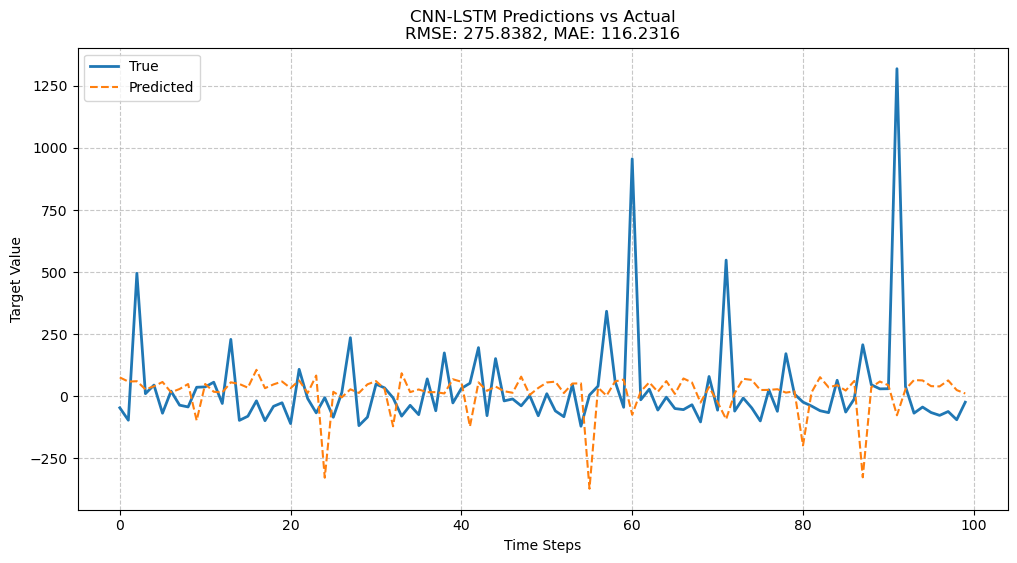

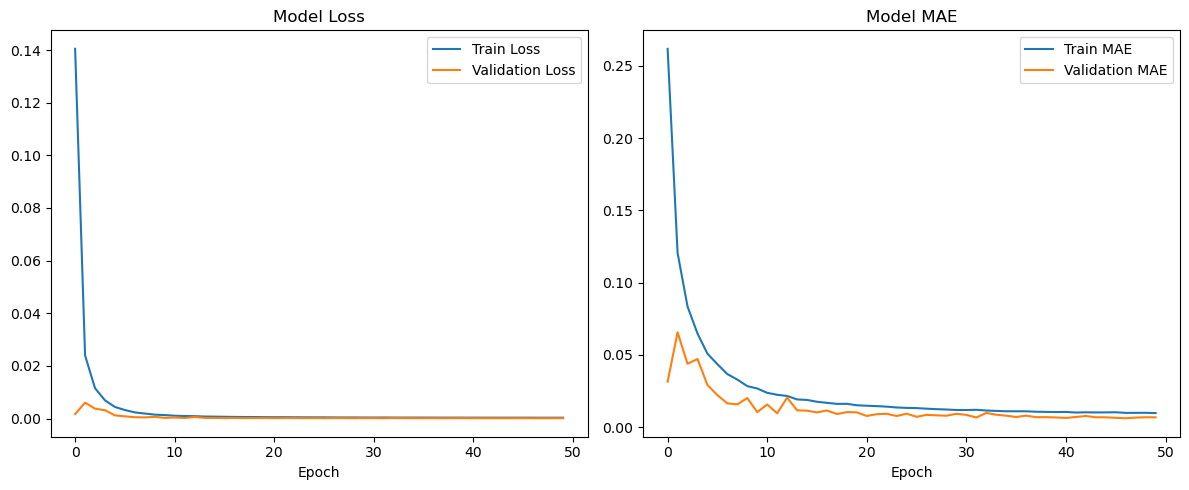

In [56]:
# ---------- SETTINGS ----------
SEQ_LEN = 30
MASK_VALUE = -999.
BATCH_SIZE = 64
EPOCHS = 50
INIT_LR = 0.0005

# ---------- IN-SAMPLE ----------
df = df2_insample.copy()

# Save original for future merging
df_original = df.copy()

# Drop categorical columns and target for features
features = df.drop(columns=[target_col, 'Company', 'Year'])  # 👈 Drop non-numeric
feature_cols = features.columns  # ✅ Save for outsample use
target = df[target_col].values

# Scale features
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(features)
X_scaled = pd.DataFrame(X_scaled, columns=features.columns)
X_scaled = X_scaled.fillna(X_scaled.mean())

# Scale target
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(target.reshape(-1, 1)).flatten()

# Create sequences
def create_sequences(data, targets, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = targets[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

X_seq, y_seq = create_sequences(X_scaled.to_numpy(), y_scaled, SEQ_LEN)

# Train/Val/Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X_seq, y_seq, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ---------- MODEL ----------
def lr_scheduler(epoch, lr):
    return float(lr) if epoch < 10 else float(lr * np.exp(-0.1))

def build_model(input_shape):
    model = Sequential()
    model.add(Masking(mask_value=MASK_VALUE, input_shape=input_shape))
    model.add(Conv1D(128, 3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(2))
    model.add(Dropout(0.2))
    model.add(Conv1D(64, 3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(2))
    model.add(Dropout(0.2))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(64))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    return model

model = build_model((SEQ_LEN, X_train.shape[2]))
optimizer = Adam(learning_rate=INIT_LR, clipvalue=1.0)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# ---------- TRAIN ----------
callbacks = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True),
    LearningRateScheduler(lr_scheduler)
]

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    verbose=1
)

# ---------- EVALUATE ----------
y_pred_scaled = model.predict(X_test).flatten()
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_true = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = np.mean(np.abs(y_true - y_pred))
print(f"\n🎯 CNN-LSTM RMSE: {rmse:.4f}")
print(f"🎯 CNN-LSTM MAE: {mae:.4f}")

# ---------- PLOTS ----------
plt.figure(figsize=(12, 6))
plt.plot(y_true[:100], label='True', linewidth=2)
plt.plot(y_pred[:100], label='Predicted', linestyle='--', linewidth=1.5)
plt.legend()
plt.title(f"CNN-LSTM Predictions vs Actual\nRMSE: {rmse:.4f}, MAE: {mae:.4f}")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel("Time Steps")
plt.ylabel("Target Value")
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

In [57]:
# ---------- OUTSAMPLE PREDICTION ----------
df_out = df2_outsample.copy()

# Backup meta info
df_out_meta = df_out[['Company', 'Year']].reset_index(drop=True)

# Drop meta columns for processing
df_out = df_out.drop(columns=['Company', 'Year'], errors='ignore')


# Ensure all feature columns are present
for col in feature_cols:
    if col not in df_out.columns:
        df_out[col] = 0  # Fill missing columns

# Align feature columns
df_out = df_out[feature_cols]

# Fill NaNs and scale
X_out_scaled = scaler_X.transform(df_out.fillna(0))

# Create sequences and track their corresponding metadata index
X_out_seq = []
meta_indices = []

for i in range(len(X_out_scaled) - SEQ_LEN):
    seq = X_out_scaled[i:i+SEQ_LEN]
    X_out_seq.append(seq)
    meta_indices.append(i + SEQ_LEN)  # We predict for this future point

X_out_seq = np.array(X_out_seq)

# Predict
y_out_scaled_pred = model.predict(X_out_seq).flatten()
y_out_pred = scaler_y.inverse_transform(y_out_scaled_pred.reshape(-1, 1)).flatten()

# Prepare final prediction DataFrame
df_pred = df_out.iloc[meta_indices].reset_index(drop=True)
df_pred_meta = df_out_meta.iloc[meta_indices].reset_index(drop=True)

df_pred['Predicted Target 1'] = y_out_pred

# Combine meta + prediction
df_pred_final = pd.concat([df_pred_meta, df_pred], axis=1)

# View results
print("\n📈 Sample Out-of-Sample Predictions:")
print(df_pred_final[['Company', 'Year', 'Predicted Target 1']].head())

df_pred_final.to_csv('LSTM-Target2.csv')

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

📈 Sample Out-of-Sample Predictions:
            Company  Year  Predicted Target 1
0  AVT Natural Prod  2023           65.163391
1  AVT Natural Prod  2024           45.749500
2   AXISCADES Tech.  2023           50.464840
3   AXISCADES Tech.  2024           33.034168
4       Aarti Drugs  2023           34.033543


## Target Growth 3

In [59]:
df = pd.read_csv('FidelFolio_df3.csv')

for col in df.columns:
    if col not in ['Company', 'Year']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        
df3 = df
target_col = 'Target 3'
# Assuming 'Year' column exists and is of numeric type.  If not, convert it first.
df3_insample = df3[df3['Year'] < 2022]
df3_outsample = df3[df3['Year'] >= 2022]

df3_insample_with_meta = df3_insample[['Company', 'Year']].copy()  # ✅ Save meta info
df3_insample = df3_insample.dropna()  # Keep this after separating

features = df.drop(columns=[target_col])
feature_cols = features.columns 

df_out = df3_outsample.copy()
df_out_meta = df_out[['Company', 'Year']].copy()  # ✅ Save meta info

Epoch 1/50


c:\Users\Tanishq op\anaconda3\Lib\site-packages\keras\src\layers\core\masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\Tanishq op\anaconda3\Lib\site-packages\keras\src\layers\layer.py:938: UserWarning: Layer 'conv1d_12' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


217/218 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2355 - mae: 0.3575

218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.2345 - mae: 0.3566 - val_loss: 0.0034 - val_mae: 0.0466 - learning_rate: 5.0000e-04
Epoch 2/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0286 - mae: 0.1325 - val_loss: 0.0063 - val_mae: 0.0604 - learning_rate: 5.0000e-04
Epoch 3/50
214/218 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0123 - mae: 0.0863

218/218 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0123 - mae: 0.0861 - val_loss: 0.0026 - val_mae: 0.0392 - learning_rate: 5.0000e-04
Epoch 4/50
215/218 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0068 - mae: 0.0645

218/218 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0068 - mae: 0.0644 - val_loss: 0.0017 - val_mae: 0.0311 - learning_rate: 5.0000e-04
Epoch 5/50
216/218 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0048 - mae: 0.0534

218/218 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0048 - mae: 0.0534 - val_loss: 0.0013 - val_mae: 0.0255 - learning_rate: 5.0000e-04
Epoch 6/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0033 - mae: 0.0438 - val_loss: 0.0022 - val_mae: 0.0374 - learning_rate: 5.0000e-04
Epoch 7/50
216/218 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0028 - mae: 0.0403

218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0028 - mae: 0.0402 - val_loss: 0.0012 - val_mae: 0.0253 - learning_rate: 5.0000e-04
Epoch 8/50
216/218 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0021 - mae: 0.0342

218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0021 - mae: 0.0342 - val_loss: 0.0011 - val_mae: 0.0235 - learning_rate: 5.0000e-04
Epoch 9/50
216/218 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0018 - mae: 0.0312

218/218 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0018 - mae: 0.0312 - val_loss: 7.6198e-04 - val_mae: 0.0180 - learning_rate: 5.0000e-04
Epoch 10/50
215/218 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0013 - mae: 0.0269

218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0013 - mae: 0.0269 - val_loss: 5.3632e-04 - val_mae: 0.0120 - learning_rate: 5.0000e-04
Epoch 11/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0012 - mae: 0.0246 - val_loss: 7.5613e-04 - val_mae: 0.0181 - learning_rate: 4.5242e-04
Epoch 12/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 9.5722e-04 - mae: 0.0219 - val_loss: 5.6933e-04 - val_mae: 0.0140 - learning_rate: 4.0937e-04
Epoch 13/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 8.1650e-04 - mae: 0.0206 - val_loss: 7.2661e-04 - val_mae: 0.0170 - learning_rate: 3.7041e-04
Epoch 14/50
215/218 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.5646e-04 - mae: 0.0196

218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 7.5675e-04 - mae: 0.0196 - val_loss: 4.9654e-04 - val_mae: 0.0109 - learning_rate: 3.3516e-04
Epoch 15/50
214/218 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.2770e-04 - mae: 0.0189

218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 7.2671e-04 - mae: 0.0189 - val_loss: 4.5069e-04 - val_mae: 0.0091 - learning_rate: 3.0327e-04
Epoch 16/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 6.7155e-04 - mae: 0.0182 - val_loss: 5.7278e-04 - val_mae: 0.0140 - learning_rate: 2.7441e-04
Epoch 17/50
217/218 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.0559e-04 - mae: 0.0171

218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 6.0525e-04 - mae: 0.0171 - val_loss: 4.3200e-04 - val_mae: 0.0094 - learning_rate: 2.4829e-04
Epoch 18/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 5.5383e-04 - mae: 0.0162 - val_loss: 4.7121e-04 - val_mae: 0.0112 - learning_rate: 2.2466e-04
Epoch 19/50
216/218 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.1871e-04 - mae: 0.0156

218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 5.1861e-04 - mae: 0.0156 - val_loss: 4.2418e-04 - val_mae: 0.0082 - learning_rate: 2.0328e-04
Epoch 20/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 5.0069e-04 - mae: 0.0152 - val_loss: 6.6496e-04 - val_mae: 0.0157 - learning_rate: 1.8394e-04
Epoch 21/50
216/218 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.8446e-04 - mae: 0.0154

218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 4.8395e-04 - mae: 0.0154 - val_loss: 4.1959e-04 - val_mae: 0.0094 - learning_rate: 1.6644e-04
Epoch 22/50
216/218 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.1072e-04 - mae: 0.0139

218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 4.1120e-04 - mae: 0.0139 - val_loss: 3.8507e-04 - val_mae: 0.0078 - learning_rate: 1.5060e-04
Epoch 23/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 3.8164e-04 - mae: 0.0133 - val_loss: 3.9364e-04 - val_mae: 0.0080 - learning_rate: 1.3627e-04
Epoch 24/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 3.8749e-04 - mae: 0.0130 - val_loss: 4.0935e-04 - val_mae: 0.0087 - learning_rate: 1.2330e-04
Epoch 25/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 4.3314e-04 - mae: 0.0138 - val_loss: 4.1247e-04 - val_mae: 0.0086 - learning_rate: 1.1157e-04
Epoch 26/50
217/218 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.0273e-04 - mae: 0.0126

218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 4.0251e-04 - mae: 0.0126 - val_loss: 3.8391e-04 - val_mae: 0.0070 - learning_rate: 1.0095e-04
Epoch 27/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 3.8974e-04 - mae: 0.0124 - val_loss: 4.1034e-04 - val_mae: 0.0079 - learning_rate: 9.1342e-05
Epoch 28/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 3.8597e-04 - mae: 0.0123 - val_loss: 3.8465e-04 - val_mae: 0.0074 - learning_rate: 8.2649e-05
Epoch 29/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 3.3600e-04 - mae: 0.0118 - val_loss: 3.9041e-04 - val_mae: 0.0085 - learning_rate: 7.4784e-05
Epoch 30/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.4004e-04 - mae: 0.0118

218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 3.4003e-04 - mae: 0.0118 - val_loss: 3.7133e-04 - val_mae: 0.0067 - learning_rate: 6.7668e-05
Epoch 31/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 3.2677e-04 - mae: 0.0112 - val_loss: 4.0867e-04 - val_mae: 0.0093 - learning_rate: 6.1228e-05
Epoch 32/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 3.0918e-04 - mae: 0.0113 - val_loss: 3.7944e-04 - val_mae: 0.0080 - learning_rate: 5.5402e-05
Epoch 33/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 3.6185e-04 - mae: 0.0113 - val_loss: 3.7848e-04 - val_mae: 0.0077 - learning_rate: 5.0129e-05
Epoch 34/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 2.9739e-04 - mae: 0.0108 - val_loss: 3.8072e-04 - val_mae: 0.0084 - learning_rate: 4.5359e-05
Epoch 35/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 3.3052e-04 - mae: 0.0111 - val_loss: 3.7550e-04 - val_mae: 0.0065 - learning_rate: 4.1043e-05
Epoch 36/50
217/218 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.7776e-04 - m

218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 2.7799e-04 - mae: 0.0105 - val_loss: 3.7109e-04 - val_mae: 0.0069 - learning_rate: 3.7137e-05
Epoch 37/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 3.0475e-04 - mae: 0.0106 - val_loss: 3.8378e-04 - val_mae: 0.0077 - learning_rate: 3.3603e-05
Epoch 38/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 2.7787e-04 - mae: 0.0105 - val_loss: 3.7889e-04 - val_mae: 0.0070 - learning_rate: 3.0405e-05
Epoch 39/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 2.8723e-04 - mae: 0.0101 - val_loss: 3.7757e-04 - val_mae: 0.0071 - learning_rate: 2.7512e-05
Epoch 40/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 2.7828e-04 - mae: 0.0103 - val_loss: 3.9614e-04 - val_mae: 0.0074 - learning_rate: 2.4894e-05
Epoch 41/50
217/218 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.8015e-04 - mae: 0.0106

218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 2.8021e-04 - mae: 0.0106 - val_loss: 3.6774e-04 - val_mae: 0.0070 - learning_rate: 2.2525e-05
Epoch 42/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 2.7934e-04 - mae: 0.0101 - val_loss: 3.7094e-04 - val_mae: 0.0074 - learning_rate: 2.0381e-05
Epoch 43/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 2.7581e-04 - mae: 0.0099 - val_loss: 3.7289e-04 - val_mae: 0.0070 - learning_rate: 1.8442e-05
Epoch 44/50
217/218 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.6063e-04 - mae: 0.0097

218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 2.6077e-04 - mae: 0.0097 - val_loss: 3.6554e-04 - val_mae: 0.0066 - learning_rate: 1.6687e-05
Epoch 45/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 2.8014e-04 - mae: 0.0099 - val_loss: 3.6563e-04 - val_mae: 0.0063 - learning_rate: 1.5099e-05
Epoch 46/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 2.6010e-04 - mae: 0.0097 - val_loss: 3.6721e-04 - val_mae: 0.0067 - learning_rate: 1.3662e-05
Epoch 47/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 2.5425e-04 - mae: 0.0096 - val_loss: 3.6715e-04 - val_mae: 0.0072 - learning_rate: 1.2362e-05
Epoch 48/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 2.4807e-04 - mae: 0.0095 - val_loss: 3.7132e-04 - val_mae: 0.0072 - learning_rate: 1.1185e-05
Epoch 49/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 2.4129e-04 - mae: 0.0095 - val_loss: 3.6771e-04 - val_mae: 0.0061 - learning_rate: 1.0121e-05
Epoch 50/50
215/218 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.5577e-04 - m

218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 2.5588e-04 - mae: 0.0094 - val_loss: 3.6492e-04 - val_mae: 0.0063 - learning_rate: 9.1578e-06
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step

🎯 CNN-LSTM RMSE: 726.7849
🎯 CNN-LSTM MAE: 189.6977


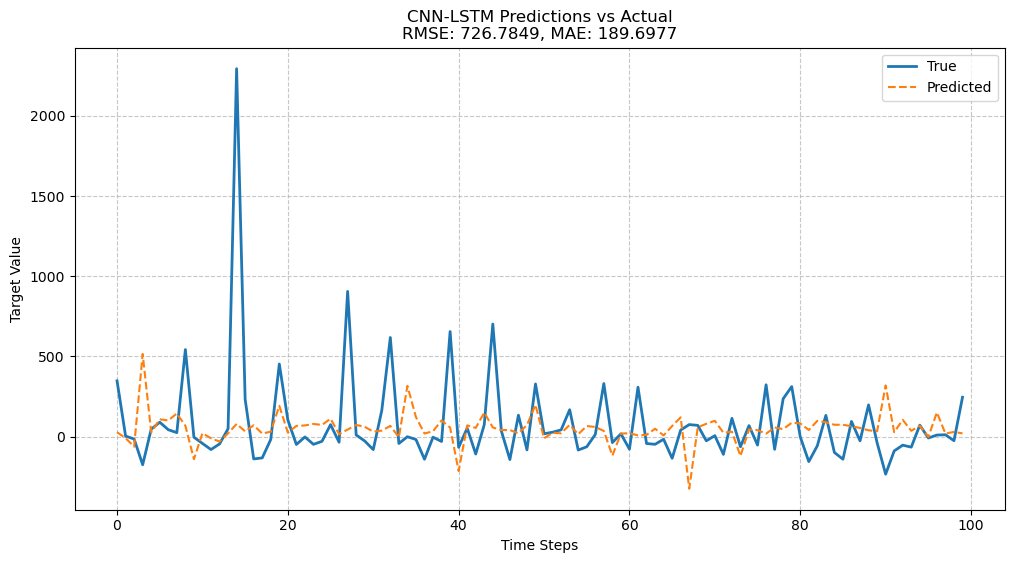

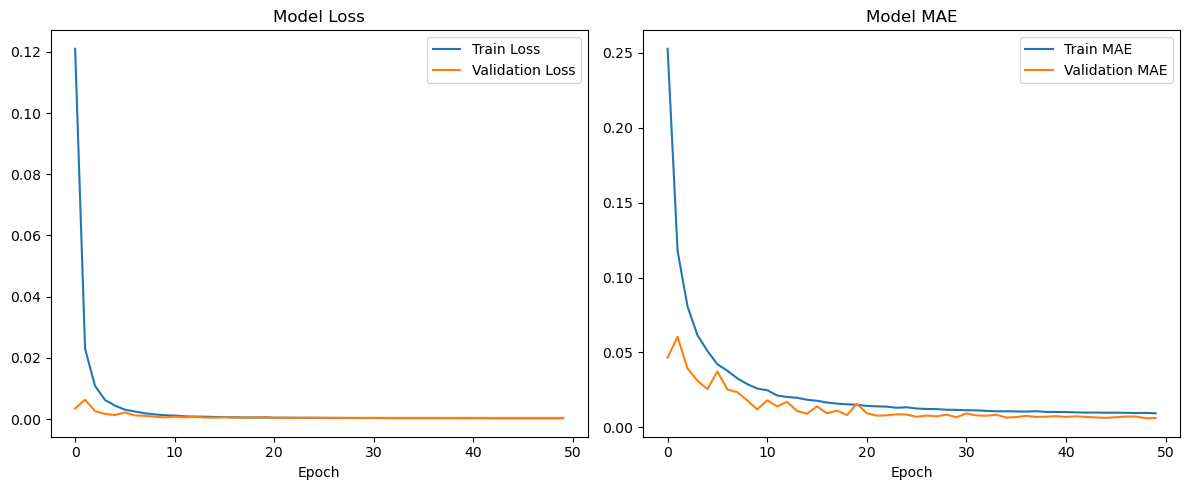

In [60]:
# ---------- SETTINGS ----------
SEQ_LEN = 30
MASK_VALUE = -999.
BATCH_SIZE = 64
EPOCHS = 50
INIT_LR = 0.0005

# ---------- IN-SAMPLE ----------
df = df3_insample.copy()

# Save original for future merging
df_original = df.copy()

# Drop categorical columns and target for features
features = df.drop(columns=[target_col, 'Company', 'Year'])  # 👈 Drop non-numeric
feature_cols = features.columns  # ✅ Save for outsample use
target = df[target_col].values

# Scale features
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(features)
X_scaled = pd.DataFrame(X_scaled, columns=features.columns)
X_scaled = X_scaled.fillna(X_scaled.mean())

# Scale target
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(target.reshape(-1, 1)).flatten()

# Create sequences
def create_sequences(data, targets, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = targets[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

X_seq, y_seq = create_sequences(X_scaled.to_numpy(), y_scaled, SEQ_LEN)

# Train/Val/Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X_seq, y_seq, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ---------- MODEL ----------
def lr_scheduler(epoch, lr):
    return float(lr) if epoch < 10 else float(lr * np.exp(-0.1))

def build_model(input_shape):
    model = Sequential()
    model.add(Masking(mask_value=MASK_VALUE, input_shape=input_shape))
    model.add(Conv1D(128, 3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(2))
    model.add(Dropout(0.2))
    model.add(Conv1D(64, 3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(2))
    model.add(Dropout(0.2))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(64))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    return model

model = build_model((SEQ_LEN, X_train.shape[2]))
optimizer = Adam(learning_rate=INIT_LR, clipvalue=1.0)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# ---------- TRAIN ----------
callbacks = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True),
    LearningRateScheduler(lr_scheduler)
]

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    verbose=1
)

# ---------- EVALUATE ----------
y_pred_scaled = model.predict(X_test).flatten()
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_true = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = np.mean(np.abs(y_true - y_pred))
print(f"\n🎯 CNN-LSTM RMSE: {rmse:.4f}")
print(f"🎯 CNN-LSTM MAE: {mae:.4f}")

# ---------- PLOTS ----------
plt.figure(figsize=(12, 6))
plt.plot(y_true[:100], label='True', linewidth=2)
plt.plot(y_pred[:100], label='Predicted', linestyle='--', linewidth=1.5)
plt.legend()
plt.title(f"CNN-LSTM Predictions vs Actual\nRMSE: {rmse:.4f}, MAE: {mae:.4f}")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel("Time Steps")
plt.ylabel("Target Value")
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

In [61]:
# ---------- OUTSAMPLE PREDICTION ----------
df_out = df3_outsample.copy()

# Backup meta info
df_out_meta = df_out[['Company', 'Year']].reset_index(drop=True)

# Drop meta columns for processing
df_out = df_out.drop(columns=['Company', 'Year'], errors='ignore')


# Ensure all feature columns are present
for col in feature_cols:
    if col not in df_out.columns:
        df_out[col] = 0  # Fill missing columns

# Align feature columns
df_out = df_out[feature_cols]

# Fill NaNs and scale
X_out_scaled = scaler_X.transform(df_out.fillna(0))

# Create sequences and track their corresponding metadata index
X_out_seq = []
meta_indices = []

for i in range(len(X_out_scaled) - SEQ_LEN):
    seq = X_out_scaled[i:i+SEQ_LEN]
    X_out_seq.append(seq)
    meta_indices.append(i + SEQ_LEN)  # We predict for this future point

X_out_seq = np.array(X_out_seq)

# Predict
y_out_scaled_pred = model.predict(X_out_seq).flatten()
y_out_pred = scaler_y.inverse_transform(y_out_scaled_pred.reshape(-1, 1)).flatten()

# Prepare final prediction DataFrame
df_pred = df_out.iloc[meta_indices].reset_index(drop=True)
df_pred_meta = df_out_meta.iloc[meta_indices].reset_index(drop=True)

df_pred['Predicted Target 3'] = y_out_pred

# Combine meta + prediction
df_pred_final = pd.concat([df_pred_meta, df_pred], axis=1)

# View results
print("\n📈 Sample Out-of-Sample Predictions:")
print(df_pred_final[['Company', 'Year', 'Predicted Target 3']].head())

df_pred_final.to_csv('LSTM-Target3.csv')

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

📈 Sample Out-of-Sample Predictions:
        Company  Year  Predicted Target 3
0  AGI Greenpac  2024           70.842941
1     AGI Infra  2023           48.981850
2     AGI Infra  2024           42.704937
3  AGS Transact  2022           32.181984
4  AGS Transact  2023           45.817696
